In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# explore and understand the data

# Create the inspector and connect it to the engine
inspector = inspect(engine)

# Collect the names of tables within the database
tables = inspector.get_table_names()

# Using the inspector to print the column names within each table and its types
for table in tables:
    print(table)
    columns = inspector.get_columns(table)
    for column in columns:
        print(column["name"], column["type"])
        
    print()

measurement
id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

station
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT



In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()

# Use the Base class to reflect the database tables
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [7]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
# Create a session
session = Session(engine)

In [ ]:
# # get most recent date
# query = "SELECT max(date) from measurement;"

# data = engine.execute(text(query))
# for record in data:
#     print(record)

In [ ]:
# query = """SELECT
#                 date,
#                 station,
#                 prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23';
# """

# df = pd.read_sql(text(query), con=engine)
# df.head()

In [ ]:
# df = df.sort_values(by="date")

# df.plot(kind="line", x="date", y="prcp", title="Hawaii Precipitation", ylabel="Inches", rot=90)
# plt.show()

In [ ]:
# df.prcp.describe()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [ ]:
# query = "SELECT max(date) from measurement;"

# data = engine.execute(text(query))
# for record in data:
#     print(record)

Text(0, 0.5, 'Inches')

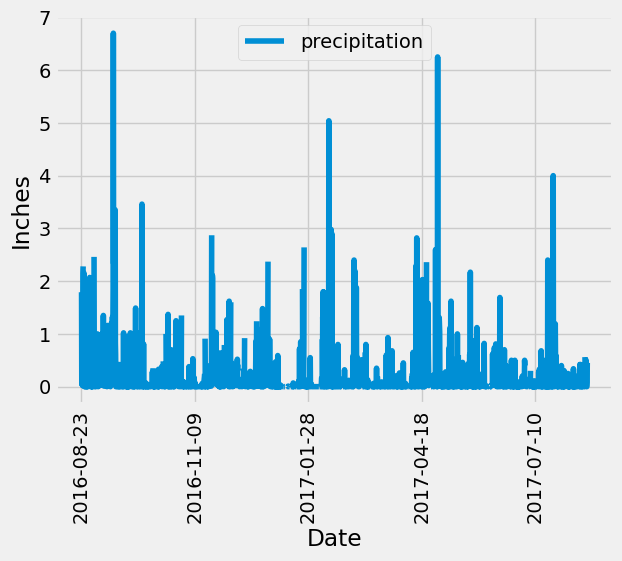

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='precipitation', rot=90)
plt.xlabel("Date")
plt.ylabel("Inches")


In [ ]:
# query = """SELECT
#                 date,
#                 station,
#                 prcp
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23';
# """

# df = pd.read_sql(text(query), con=engine)
# df.head()

In [ ]:
# df = df.sort_values(by="date")

# df.plot(kind="line", x="date", y="prcp", title="Hawaii Precipitation", ylabel="Inches", rot=90)
# plt.show()

In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data


In [11]:
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset


In [ ]:
# query = "SELECT count(id) from station;"

# data = engine.execute(text(query))
# for record in data:
#     print(record)

In [12]:
session.query(func.count(Station.id)).all()

[(9,)]

In [ ]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.


In [ ]:
# query = """SELECT
#                 station,
#                 count(id) as num_obs
#             FROM
#                 measurement
#             GROUP BY
#                 station
#             ORDER BY
#                 num_obs desc;
# """

# df2 = pd.read_sql(text(query), con=engine)
# df2.head()

In [13]:
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [ ]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [ ]:
# query = """SELECT
#                 min(tobs),
#                 max(tobs),
#                 avg(tobs)
#             FROM
#                 measurement
#             WHERE
#                 station = 'USC00519281'
# """

# df3 = pd.read_sql(text(query), con=engine)
# df3

In [14]:
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

In [ ]:
# data = engine.execute(text(query))
# for record in data:
#     print(record)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [ ]:
# query = """SELECT
#                 date,
#                 station,
#                 tobs
#             FROM
#                 measurement
#             WHERE
#                 date >= '2016-08-23'
#                 AND station = 'USC00519281'
#             ORDER BY
#                 date asc;
# """
# df = pd.read_sql(text(query), con=engine)
# df.head()

In [18]:
data = session.query(Measurement.date, Measurement.station, Measurement.tobs).filter(Measurement.date >= '2016-08-23').filter(Measurement.station == 'USC00519281').order_by(Measurement.date).all()

df2 = pd.DataFrame(data, columns=["date", "station", "tobs"])

df2.head()

,date,station,tobs
0,2016-08-23,USC00519281,77.0
1,2016-08-24,USC00519281,77.0
2,2016-08-25,USC00519281,80.0
3,2016-08-26,USC00519281,80.0
4,2016-08-27,USC00519281,75.0


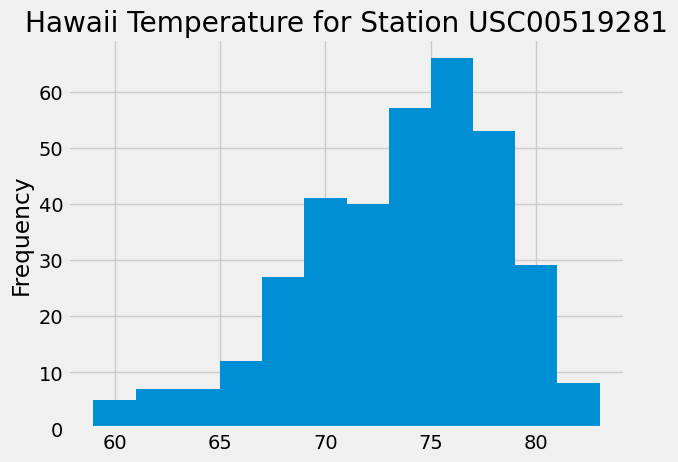

In [19]:
df2.tobs.plot.hist(bins=12, title="Hawaii Temperature for Station USC00519281", ylabel="Frequency")
plt.show()

# Close Session

In [20]:
# Close Session
session.close()